#### NLP(자연어 처리)
* BOW(Bag of words)
    - Word Count : 단어수 기반의 맵을 만들어서 의미 분석
* 단어를 수집하여 문장의 특성을 파악
- 아버지가방에들어가신다
- 형태소분석 의미 분석
    - 형태소 분석기 필요 :
    - konlpy(한국판)
    - mecab(일본판)
    - kkma(한국판)

In [ ]:
# java 먼저 설치
!pip install jpype1

In [ ]:
!pip install konlpy

In [3]:
from konlpy.tag import Kkma

In [4]:
kkma=Kkma()

In [3]:
!python --version

Python 3.8.5


In [14]:
# 전체 텍스트 데이터로부터 전체에 영향을 주는 단어 맵 생성
res = """
미국 뉴욕증권거래소에 상장된 쿠팡 주식이 공모가인 35달러에서 40.71% 오른 49.25달러에 거래를 마감했습니다.
현지시간 11일 쿠팡 주식은 공모가에서 81.4%나 상승한 64.50달러로 장을 시작해 장중 69달러까지 오르기도 했지만 이후 상승 폭이 줄었습니다.
야후 파이넌스에 따르면 쿠팡의 시총은 종가 기준으로 886억5천만 달러, 우리 돈으로 약 100조4천억 원을 기록했습니다.
쿠팡은 이번 기업공개에서 45억5천만 달러, 약 5조1천678억원을 조달한 것으로 알려져 2019년 우버 이후 기업공개 최대 실적을 기록했습니다.
"""

In [21]:
jres=res
p = kkma.pos(jres)
#len(jres)

In [42]:
def nlppos(txt):
    p = kkma.pos(txt)
    #print(p)
    dictpos = {}
    check=['NNG','NNP','NNB','NNM','VV','VA','VXV','VXA']
    for w,pos in p:
        if (pos in check):
            if (w in dictpos.keys()):
                dictpos[w]+=1
            else :
                dictpos[w]=1
                #print('없음',w)
    return dictpos

In [49]:
dictposctpos = nlppos(res)
len(list(dictpos))

[('미국', 'NNP'), ('뉴욕', 'NNP'), ('증권', 'NNG'), ('거래소', 'NNG'), ('에', 'JKM'), ('상장', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('쿠팡', 'UN'), ('주식', 'NNG'), ('이', 'JKS'), ('공모', 'NNG'), ('가인', 'NNG'), ('35', 'NR'), ('달러', 'NNG'), ('에서', 'JKM'), ('40.71', 'NR'), ('%', 'SW'), ('오르', 'VV'), ('ㄴ', 'ETD'), ('49.25', 'NR'), ('달러', 'NNG'), ('에', 'JKM'), ('거래', 'NNG'), ('를', 'JKO'), ('마감', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('습니다', 'EFN'), ('.', 'SF'), ('현지', 'NNG'), ('시간', 'NNG'), ('11', 'NR'), ('일', 'NNM'), ('쿠', 'ECE'), ('팡', 'UN'), ('주식', 'NNG'), ('은', 'JX'), ('공모', 'NNG'), ('가', 'JKS'), ('에', 'VV'), ('서', 'ECD'), ('81.4', 'NR'), ('%', 'SW'), ('나', 'JX'), ('상승', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('64.50', 'NR'), ('달러', 'NNG'), ('로', 'JKM'), ('장', 'NNG'), ('을', 'JKO'), ('시작하', 'VV'), ('어', 'ECS'), ('장', 'NNG'), ('중', 'NNB'), ('69', 'NR'), ('달러', 'NNG'), ('까지', 'JX'), ('오르기', 'NNG'), ('도', 'JX'), ('하', 'VV'), ('었', 'EPT'), ('지만', 'ECE'), ('이후', 'NNG'), ('상승', 'NNG'), ('폭', 'NNG'), ('이', 'JKS'), ('

46

In [24]:
dictpos

{'미국': 1,
 '뉴욕': 1,
 '증권': 1,
 '거래소': 1,
 '상장': 1,
 '주식': 2,
 '공모': 2,
 '가인': 1,
 '달러': 6,
 '오르': 1,
 '거래': 1,
 '마감': 1,
 '현지': 1,
 '시간': 1,
 '일': 1,
 '에': 1,
 '상승': 2,
 '장': 2,
 '시작하': 1,
 '중': 1,
 '오르기': 1,
 '하': 1,
 '이후': 2,
 '폭': 1,
 '줄': 1,
 '야': 1,
 '후': 1,
 '따르': 1,
 '시': 1,
 '총은': 1,
 '종가': 1,
 '기준': 1,
 '돈': 1,
 '약': 2,
 '원': 2,
 '기록하': 2,
 '이번': 1,
 '기업': 2,
 '공개': 2,
 '조달': 1,
 '것': 1,
 '알리': 1,
 '지': 1,
 '년': 1,
 '최대': 1,
 '실적': 1}

In [60]:
# 전체 단어 맵
cols = list(dictpos.keys())
cols

['미국',
 '뉴욕',
 '증권',
 '거래소',
 '상장',
 '주식',
 '공모',
 '가인',
 '달러',
 '오르',
 '거래',
 '마감',
 '현지',
 '시간',
 '일',
 '에',
 '상승',
 '장',
 '시작하',
 '중',
 '오르기',
 '하',
 '이후',
 '폭',
 '줄',
 '야',
 '후',
 '따르',
 '시',
 '총은',
 '종가',
 '기준',
 '돈',
 '약',
 '원',
 '기록하',
 '이번',
 '기업',
 '공개',
 '조달',
 '것',
 '알리',
 '지',
 '년',
 '최대',
 '실적']

In [44]:
# top-down방식으로 많이 쓰는 단어로 내용을 추측할 수 있다.
sres=sorted(dictpos.items(),key=lambda x:x[1],reverse=True)
sres
# word count해서 단어의 가중치를 알아보겠다

[('달러', 6),
 ('주식', 2),
 ('공모', 2),
 ('상승', 2),
 ('장', 2),
 ('이후', 2),
 ('약', 2),
 ('원', 2),
 ('기록하', 2),
 ('기업', 2),
 ('공개', 2),
 ('미국', 1),
 ('뉴욕', 1),
 ('증권', 1),
 ('거래소', 1),
 ('상장', 1),
 ('가인', 1),
 ('오르', 1),
 ('거래', 1),
 ('마감', 1),
 ('현지', 1),
 ('시간', 1),
 ('일', 1),
 ('에', 1),
 ('시작하', 1),
 ('중', 1),
 ('오르기', 1),
 ('하', 1),
 ('폭', 1),
 ('줄', 1),
 ('야', 1),
 ('후', 1),
 ('따르', 1),
 ('시', 1),
 ('총은', 1),
 ('종가', 1),
 ('기준', 1),
 ('돈', 1),
 ('이번', 1),
 ('조달', 1),
 ('것', 1),
 ('알리', 1),
 ('지', 1),
 ('년', 1),
 ('최대', 1),
 ('실적', 1)]

In [29]:
len(list(sres))

46

In [61]:
# 맵 딕셔너리 생성
wmap = {}
for col in cols:
    wmap[col] = 0
    

In [62]:
wmap

{'미국': 0,
 '뉴욕': 0,
 '증권': 0,
 '거래소': 0,
 '상장': 0,
 '주식': 0,
 '공모': 0,
 '가인': 0,
 '달러': 0,
 '오르': 0,
 '거래': 0,
 '마감': 0,
 '현지': 0,
 '시간': 0,
 '일': 0,
 '에': 0,
 '상승': 0,
 '장': 0,
 '시작하': 0,
 '중': 0,
 '오르기': 0,
 '하': 0,
 '이후': 0,
 '폭': 0,
 '줄': 0,
 '야': 0,
 '후': 0,
 '따르': 0,
 '시': 0,
 '총은': 0,
 '종가': 0,
 '기준': 0,
 '돈': 0,
 '약': 0,
 '원': 0,
 '기록하': 0,
 '이번': 0,
 '기업': 0,
 '공개': 0,
 '조달': 0,
 '것': 0,
 '알리': 0,
 '지': 0,
 '년': 0,
 '최대': 0,
 '실적': 0}

In [64]:
# 개별 텍스트 데이터로부터 개별 맵을 생성
sres = res.split('\n')
wbag=[]
for s in sres:
    wm = wmap
    print(wm)
    if(s):
        wm=wmap.copy()
        sdict = nlppos(s)
        for skey in sdict.keys():
            wm[skey] = sdict[skey]
        wbag.append((list(wm.values())))
    #print(sdict)

{'미국': 1, '뉴욕': 1, '증권': 1, '거래소': 1, '상장': 1, '주식': 1, '공모': 1, '가인': 1, '달러': 1, '오르': 1, '거래': 1, '마감': 1, '현지': 1, '시간': 1, '일': 1, '에': 1, '상승': 2, '장': 2, '시작하': 1, '중': 1, '오르기': 1, '하': 1, '이후': 1, '폭': 1, '줄': 1, '야': 1, '후': 1, '따르': 1, '시': 1, '총은': 1, '종가': 1, '기준': 1, '돈': 1, '약': 1, '원': 1, '기록하': 1, '이번': 1, '기업': 2, '공개': 2, '조달': 1, '것': 1, '알리': 1, '지': 1, '년': 1, '최대': 1, '실적': 1}
{'미국': 1, '뉴욕': 1, '증권': 1, '거래소': 1, '상장': 1, '주식': 1, '공모': 1, '가인': 1, '달러': 1, '오르': 1, '거래': 1, '마감': 1, '현지': 1, '시간': 1, '일': 1, '에': 1, '상승': 2, '장': 2, '시작하': 1, '중': 1, '오르기': 1, '하': 1, '이후': 1, '폭': 1, '줄': 1, '야': 1, '후': 1, '따르': 1, '시': 1, '총은': 1, '종가': 1, '기준': 1, '돈': 1, '약': 1, '원': 1, '기록하': 1, '이번': 1, '기업': 2, '공개': 2, '조달': 1, '것': 1, '알리': 1, '지': 1, '년': 1, '최대': 1, '실적': 1}
[('미국', 'NNP'), ('뉴욕', 'NNP'), ('증권', 'NNG'), ('거래소', 'NNG'), ('에', 'JKM'), ('상장', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('쿠팡', 'UN'), ('주식', 'NNG'), ('이', 'JKS'), ('공모', 'NNG'), ('가인', 'NNG'), ('

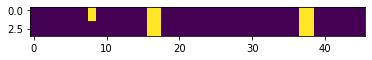

In [66]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(wbag)
# 컴퓨터가 위의 문장을 이해하는 그림(숫자로만 파악함)

In [65]:
import pandas as pd
wdf = pd.DataFrame(data=wbag,columns = cols)
wdf.head()

,미국,뉴욕,증권,거래소,상장,주식,공모,가인,달러,오르,...,이번,기업,공개,조달,것,알리,지,년,최대,실적
0,1,1,1,1,1,1,1,1,2,1,...,1,2,2,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,2,1,...,1,2,2,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,2,2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,2,2,1,1,1,1,1,1,1
